This notebook is based on: https://esciencecenter-digital-skills.github.io/geospatial-python/06-raster-intro.html

 In this episode we will dive more into raster data and focus on how to work with them. We introduce fundamental principles, python packages, metadata and raster attributes for working with this type of data. In addition, we will explore how Python handles missing and bad data values.

The Python package we will use throughout this episode to handle raster data is rioxarray. This package is based on the popular rasterio (which is build upon the GDAL library) for working with raster data and xarray for working with multi-dimensional arrays.

rioxarray extends xarray by providing top-level functions like the open_rasterio function to open raster datasets.

It adds a set of methods to the main objects of the xarray package like the Dataset and the DataArray. These methods are made available via the rio accessor and become available from xarray objects after importing rioxarray.

# Load a Raster and View Attributes

To analyse the burned areas, we are interested in the red band of the satellite scene. In episode 9 we will further explain why the characteristics of that band are interesting in relation to wildfires. For now, we can load the red band using the function rioxarray.open_rasterio():

In [2]:
import rioxarray


Explain relationship rioxarray xarray rastterio pyproj and numpy.

Since a lot of the functions, methods and attributes from rioxarray originate from other packages (mostly rasterio), the documentation is in some cases limited and requires a little puzzling. It is therefore recommended to foremost focus at the notebook´s functionality to use tab completion and go through the various functionalities. In addition, adding a question mark ? after every function or method offers the opportunity to see the available options.

For instance if you want to understand the options for rioxarray´s open_rasterio function:

In [3]:
rioxarray.open_rasterio?

Signature:
rioxarray.open_rasterio(
    filename: Union[str, os.PathLike, rasterio.io.DatasetReader, rasterio.vrt.WarpedVRT, rioxarray._io.SingleBandDatasetReader],
    parse_coordinates: Optional[bool] = None,
    chunks: Union[int, tuple, dict, NoneType] = None,
    cache: Optional[bool] = None,
    lock: Optional[Any] = None,
    masked: bool = False,
    mask_and_scale: bool = False,
    variable: Union[str, list[str], tuple[str, ...], NoneType] = None,
    group: Union[str, list[str], tuple[str, ...], NoneType] = None,
    default_name: Optional[str] = None,
    decode_times: bool = True,
    decode_timedelta: Optional[bool] = None,
    band_as_variable: bool = False,
    **open_kwargs,
) -> Union[xarray.core.dataset.Dataset, xarray.core.dataarray.DataArray, list[xarray.core.dataset.Dataset]]
Docstring:
Open a file with rasterio (experimental).

This should work with any file that rasterio can open (most often:
geoTIFF). The x and y coordinates are generated automatically from the

In [4]:
red = rioxarray.open_rasterio('../data/input_data/sentinel2/red.tif')

In [5]:
red

<xarray.DataArray (band: 1, y: 10980, x: 10980)> Size: 241MB
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 88kB 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05
  * y            (y) float64 88kB 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

By printing the variable we can get a quick look at the shape and attributes of the data.

In [6]:
print(red)

<xarray.DataArray (band: 1, y: 10980, x: 10980)> Size: 241MB
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 88kB 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05
  * y            (y) float64 88kB 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


The output tells us that we are looking at an xarray.DataArray, with 1 band, 10980 rows, and 10980 columns. We can also see the number of pixel values in the DataArray, and the type of those pixel values, which is unsigned integer (or uint16). The DataArray also stores different values for the coordinates of the DataArray. When using rioxarray, the term coordinates refers to spatial coordinates like x and y but also the band coordinate. Each of these sequences of values has its own data type, like float64 for the spatial coordinates and int64 for the band coordinate.

This DataArray object also has a couple of attributes that are accessed like .rio.crs, .rio.nodata, and .rio.bounds(), which contains the metadata for the file we opened. Note that many of the metadata are accessed as attributes without (), however since bounds() is a method (i.e. a function in an object, it needs to do something to estimate the bounds) it requires these parentheses this is also the case for .rio.resolution().

.rio is an accessor  and a way to access attributes or methods to get information from an object in a clean and controlled way. An accessor allows you to retrieve information from an object, without modifying it.

In [7]:
print(red.rio.crs)
print(red.rio.nodata)
print(red.rio.bounds())
print(red.rio.width)
print(red.rio.height)
print(red.rio.resolution())

EPSG:32635
0
(499980.0, 3990240.0, 609780.0, 4100040.0)
10980
10980
(10.0, -10.0)


In [8]:
print(red.max())
print(red.min())

<xarray.DataArray ()> Size: 2B
array(23384, dtype=uint16)
Coordinates:
    spatial_ref  int32 4B 0
<xarray.DataArray ()> Size: 2B
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int32 4B 0


In [9]:
print(red.rio.crs)

EPSG:32635


The Coordinate Reference System, or rhodes_red.rio.crs, is reported as the string EPSG:32635. The nodata value is encoded as 0 and the bounding box corners of our raster are represented by the output of .bounds() as a tuple (like a list but you can’t edit it). The height and width match what we saw when we printed the DataArray, but by using .rio.width and .rio.height we can access these values if we need them in calculations.

Visualize a Raster

After viewing the attributes of our raster, we can examine the raw values of the array with .values:

An array is a collection of items stored at memory locations, where all items are of the same type.

In regular Python (without external libraries), the most common array-like structure is a list:

In [10]:
red.values

array([[[ 0,  0,  0, ..., 57, 43, 44],
        [ 0,  0,  0, ..., 61, 24, 19],
        [ 0,  0,  0, ..., 22,  1,  1],
        ...,
        [ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  1,  1,  1]]], dtype=uint16)

This can give us a quick view of the values of our array, but only at the corners. Since our raster is loaded in python as a DataArray type, we can plot this in one line similar to a pandas DataFrame with DataArray.plot().



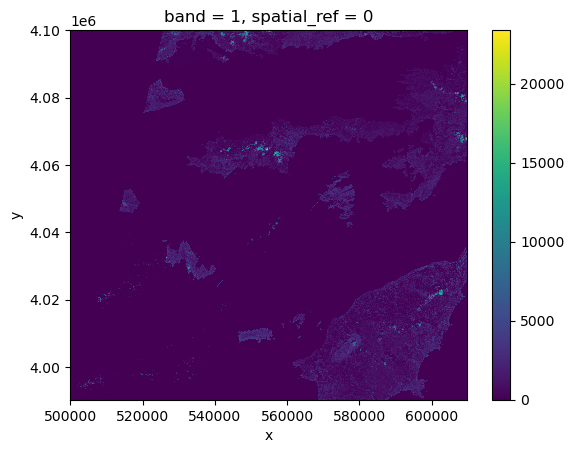

In [11]:
red.plot()

Resampling the raster image

The red band image is available as a raster file with 10 m resolution, which makes it a relatively large file (few hundreds MBs). In order to keep calculations “manageable” (reasonable execution time and memory usage) we select here a lower resolution version of the image, taking advantage of the so-called “pyramidal” structure of cloud-optimized GeoTIFFs (COGs). COGs, in fact, typically include multiple lower-resolution versions of the original image, called “overviews”, in the same file. This allows us to avoid downloading high-resolution images when only quick previews are required.

Overviews are often computed using powers of 2 as down-sampling (or zoom) factors. So, typically, the first level overview (index 0) corresponds to a zoom factor of 2, the second level overview (index 1) corresponds to a zoom factor of 4, and so on. Here, we open the third level overview (index 2, zoom factor 8) and check that the resolution is about 80 m:

In [ ]:
red_lowres = rioxarray.open_rasterio('../data/input_data/sentinel2/red.tif', overview_level=2)

In [ ]:
red_lowres

In [ ]:
red_lowres.plot()

This plot shows the satellite measurement of the band red for Rhodes before the wildfire. According to the Sentinel-2 documentaion, this is a band with the central wavelength of 665nm. It has a spatial resolution of 10m. Note that the band=1 in the image title refers to the ordering of all the bands in the DataArray, not the Sentinel-2 band red. 


In [ ]:
red_lowres.plot(vmin=100, vmax=2000)

More options can be consulted here. You will notice that these parameters are part of the imshow method from the plot function. Since plot originates from matplotlib and is so widely used, your python environment helps you to interpret the parameters without having to specify the method. It is a service to help you, but can be confusing when teaching it. We will explain more about this below.

In [ ]:
red_lowres.plot(robust=True)

## View Raster Coordinate Reference System (CRS) in Python

Another information that we’re interested in is the CRS, and it can be accessed with .rio.crs. We introduced the concept of a CRS in an earlier episode. Now we will see how features of the CRS appear in our data file and what meanings they have. We can view the CRS string associated with our DataArray’s rio object using the crs attribute.

In [ ]:
red.rio.crs

To print the EPSG code number as an int, we use the .to_epsg() method (which originally is part of rasterio to_epsg):

In [ ]:
epsg = red.rio.crs.to_epsg()
epsg 

EPSG codes are great for succinctly representing a particular coordinate reference system. But what if we want to see more details about the CRS, like the units? For that, we can use pyproj , a library for representing and working with coordinate reference systems.

In [ ]:
from pyproj import CRS
crs = CRS(epsg)
crs

The CRS class from the pyproj library allows us to create a CRS object with methods and attributes for accessing specific information about a CRS, or the detailed summary shown above.

A particularly useful attribute is area_of_use, which shows the geographic bounds that the CRS is intended to be used.

In [ ]:
crs.area_of_use

## Dealing with Missing Data

So far, we have visualized a band of a Sentinel-2 scene and calculated its statistics. However, as you can see on the image it also contains an artificial band to the top left where data is missing. In order to calculate meaningfull statistics, we need to take missing data into account. Raster data often has a “no data value” associated with it and for raster datasets read in by rioxarray. This value is referred to as nodata. This is a value assigned to pixels where data is missing or no data were collected. There can be different cases that cause missing data, and it’s common for other values in a raster to represent different cases. The most common example is missing data at the edges of rasters.

By default the shape of a raster is always rectangular. So if we have a dataset that has a shape that isn’t rectangular, like most satellite images, some pixels at the edge of the raster will have no data values. This often happens when the data were collected by a sensor which only flew over some part of a defined region and is also almost by default because of the fact that the earth is not flat and that we work with geographic and projected coordinate system.

To check the value of nodata of this dataset you can use:

In [ ]:
red.rio.nodata

You will find out that this is 0. When we have plotted the band data, or calculated statistics, the missing value was not distinguished from other values. Missing data may cause some unexpected results.

To distinguish missing data from real data, one possible way is to use nan(which stands for Not a Number) to represent them. This can be done by specifying masked=True when loading the raster. Let us reload our data and put it into a different variable with the mask:

In [ ]:
red_nodata = rioxarray.open_rasterio('../data/input_data/sentinel2/red.tif', masked=True, overview_level=2)

In [ ]:
print(red_nodata)

In [ ]:
red_lowres.where(red_lowres != red_lowres.rio.nodata)

Either way will change the nodata value from 0 to nan. Now if we compute the statistics again, the missing data will not be considered. Let´s compare them:

In [ ]:
print(red_lowres.min())
print(red_nodata.min())
print(red_lowres.max())
print(red_nodata.max())
print(red_lowres.mean())
print(red_nodata.mean())
print(red_lowres.std())
print(red_nodata.std())

And if we plot the image, the nodata pixels are not shown because they are not 0 anymore:

In [ ]:
red_nodata.plot(robust=True)

One should notice that there is a side effect of using nan instead of 0 to represent the missing data: the data type of the DataArray was changed from integers to float (as can be seen when we printed the statistics). This needs to be taken into consideration when the data type matters in your application.

## Raster Bands

So far we looked into a single band raster, i.e. the red band of a Sentinel-2 scene. However, for certain applications it is helpful to visualize the true-color image of the region. This is provided as a multi-band raster – a raster dataset that contains more than one band.

The visual asset in the Sentinel-2 scene is a multiband asset. Similar to the red band, we can load it by:

In [ ]:
visual_lowres = rioxarray.open_rasterio('../data/input_data/sentinel2/visual.tif', overview_level=2)
visual_lowres

The band number comes first when GeoTiffs are read with the .open_rasterio() function. As we can see in the xarray.DataArray object, the shape is now (band: 3, y: 1373, x: 1373), with three bands in the band dimension. It’s always a good idea to examine the shape of the raster array you are working with and make sure it’s what you expect. Many functions, especially the ones that plot images, expect a raster array to have a particular shape. One can also check the shape using the .shape attribute:

In [ ]:
visual_lowres.shape

In [ ]:
visual_lowres.plot()

One can visualize the multi-band data with the DataArray.plot.imshow() function:

https://docs.xarray.dev/en/v2024.02.0/generated/xarray.plot.imshow.html

In [ ]:
visual_lowres.plot.imshow()

Note that the DataArray.plot.imshow() function makes assumptions about the shape of the input DataArray, that since it has three channels, the correct colormap for these channels is RGB. It does not work directly on image arrays with more than 3 channels. One can replace one of the RGB channels with another band, to make a false-color image.